In [1]:
TEST_FILE_DIR = "../../test_data/unit_tests/input_table_formats"
OUTDIR = f"{TEST_FILE_DIR}/outdir"

SPECTRONAUT_FILE = f"{TEST_FILE_DIR}/spectronaut.frgions.large.tsv"

FILE_DEFAULT = "default_out.tsv"
FILE_DASK_PROC = "dask_proc_out.tsv"



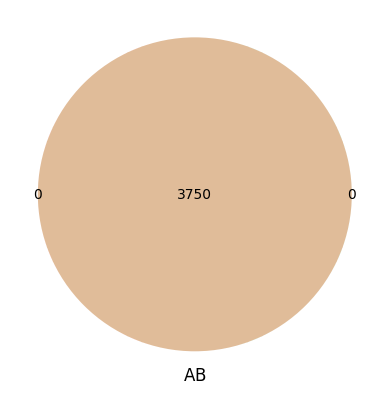

In [3]:

import os
import pandas as pd
import shutil
import matplotlib_venn
import alphabase.quantification.quant_reader.config_dict_loader as config_dict_loader
import alphabase.quantification.quant_reader.longformat_reader as longformat_reader



def test_table_loadings(input_file, outdir, file_default, file_dask_proc):
    if not os.path.exists(outdir):
        os.mkdir(outdir)
        #os.chdir(outdir)

    input_type, config_dict_for_type, sep = config_dict_loader.get_input_type_and_config_dict(input_file)

    longformat_reader.reformat_and_write_longtable_according_to_config(input_file,outfile_name=file_dask_proc,config_dict_for_type=config_dict_for_type, enforce_largefile_processing=True, chunksize=10_000)
    longformat_reader.reformat_and_write_longtable_according_to_config(input_file,outfile_name=file_default,config_dict_for_type=config_dict_for_type, chunksize=10_000)

    df_default = pd.read_csv(file_default, sep = "\t")

    df_dask_proc = pd.read_csv(file_dask_proc, sep = "\t")


    assert df_default.equals(df_dask_proc)

    matplotlib_venn.venn2([set(df_default["quant_id"]), set(df_dask_proc["quant_id"])])

    os.remove(file_default)
    os.remove(file_dask_proc)
    shutil.rmtree(outdir)


test_table_loadings(SPECTRONAUT_FILE, OUTDIR, FILE_DEFAULT, FILE_DASK_PROC)
#hide


In [4]:
import alphabase.quantification.quant_reader.quant_reader_manager as quant_reader_manager
import os
import shutil

INPUT_FILES = [os.path.join(TEST_FILE_DIR, x ) for x in ["diann.tsv", "spectronaut.tsv", "spectronaut_frgion.tsv", "mq_peptides.txt", "diann_test_input_mDIA.tsv"]]


def perform_table_loading(SPECTRONAUT_FILE):
    """only makes sure that the commands run without error"""
    
    #import the input table once the input and the results folder are specified. 
    # The function automatically recognizes the format (Currently MQ, Spectronaut, DIA-NN configured)
    input_data = quant_reader_manager.import_data(SPECTRONAUT_FILE)
    #display(input_data)
    

for idx in range(len(INPUT_FILES)):
    perform_table_loading(INPUT_FILES[idx])
    print('loading ran through')




using input type diann_fragion_isotopes
loading ran through
using input type spectronaut_precursor_v2
loading ran through
using input type spectronaut_fragion_isotopes
loading ran through
using input type maxquant_peptides
loading ran through
using input type diann_fragion_isotopes_mDIA_raw
loading ran through


using input type spectronaut_precursor_v2
['EG.ModifiedSequence', 'FG.Charge', 'R.Label']
['EG.ModifiedSequence', 'FG.Charge', 'R.Label', 'FG.Quantity']


,R.Label,EG.ModifiedSequence,FG.Charge,FG.Quantity,compareID
0,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,_VDFNVPLDGK_,2,516162.875000,_VDFNVPLDGK_220210603_EXPL1_MCT_SA_species_100...
1,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,_VDFNVPLDGK_,2,516162.875000,_VDFNVPLDGK_220210603_EXPL1_MCT_SA_species_100...
2,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,_ELPGVAFLSEK_,2,208312.218750,_ELPGVAFLSEK_220210603_EXPL1_MCT_SA_species_10...
3,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,_AAGFLLEK_,1,6899.296387,_AAGFLLEK_120210603_EXPL1_MCT_SA_species_100ng...
4,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,_YHIEEEGSRK_,3,65150.085938,_YHIEEEGSRK_320210603_EXPL1_MCT_SA_species_100...
...,...,...,...,...,...
6388,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw,_TVIGEVLLEQAYGGMR_,2,28181.175781,_TVIGEVLLEQAYGGMR_220210603_EXPL1_MCT_SA_speci...
6389,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw,_TVIGEVLLEQAYGGMR_,2,28181.175781,_TVIGEVLLEQAYGGMR_220210603_EXPL1_MCT_SA_speci...
6390,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw,_TVIGEVLLEQAYGGMR_,2,28181.175781,_TVIGEVLLEQAYGGMR_220210603_EXPL1_MCT_SA_speci...
6391,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw,_SEIPEHVIQLLDSLPK_,2,48164.636719,_SEIPEHVIQLLDSLPK_220210603_EXPL1_MCT_SA_speci...


['SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CHARGE_2_', 'SEQ_ALQSINVK_MOD__ALQSINVK__CHARGE_2_', 'SEQ_FSIIESQTR_MOD__FSIIESQTR__CHARGE_2_', 'SEQ_GISEVTENTGK_MOD__GISEVTENTGK__CHARGE_2_', 'SEQ_IAGNAVGSVVK_MOD__IAGNAVGSVVK__CHARGE_2_', 'SEQ_NLLSNGSPPMNDGSDANAK_MOD__NLLSNGSPPMNDGSDANAK__CHARGE_2_', 'SEQ_PFAENLESDINQTETGQAAPIDNYK_MOD__PFAENLESDINQTETGQAAPIDNYK__CHARGE_3_', 'SEQ_SQSPISER_MOD__SQSPISER__CHARGE_2_', 'SEQ_SYTDNPPQTK_MOD__[Acetyl (Protein N-term)]SYTDNPPQTK__CHARGE_2_', 'SEQ_VGQFIEK_MOD__VGQFIEK__CHARGE_2_', 'SEQ_VSYIHNDSCTR_MOD__VSYIHNDSC[Carbamidomethyl (C)]TR__CHARGE_2_', 'SEQ_VSYIHNDSCTR_MOD__VSYIHNDSC[Carbamidomethyl (C)]TR__CHARGE_3_', 'SEQ_DVGEIDLSDPILR_MOD__DVGEIDLSDPILR__CHARGE_2_', 'SEQ_FPMTLIR_MOD__FPMTLIR__CHARGE_2_', 'SEQ_HEIPQISQPK_MOD__HEIPQISQPK__CHARGE_2_', 'SEQ_ITPVQLLK_MOD__ITPVQLLK__CHARGE_2_', 'SEQ_EIAGLSPYER_MOD__EIAGLSPYER__CHARGE_2_', 'SEQ_TGIAIGLNK_MOD__TGIAIGLNK__CHARGE_1_', 'SEQ_TGIAIGLNK_MOD__TGIAIGLNK__CHARGE_2_', 'SEQ_VEEMNNIIAASR_MOD__VEEMNNIIAA

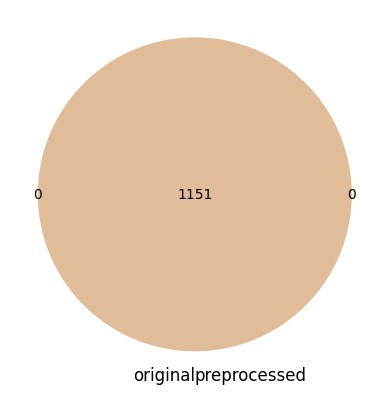

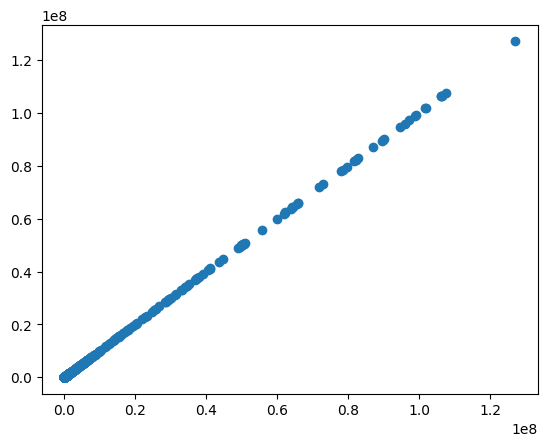

correlation between both processings: 1.0


In [5]:

#hide
import yaml
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

def compare_generic_table_with_original(preprocessed_input_df, original_SPECTRONAUT_FILE, config_yaml,input_typename_config, sep = "\t"):
    id2quant_orig, id2quant_preproc = get_processed_original_id2quant_maps(preprocessed_input_df, original_SPECTRONAUT_FILE, config_yaml,input_typename_config)
    keys_orig = set(id2quant_orig.keys())
    keys_preproc = set(id2quant_preproc.keys())
    keydiff = keys_preproc.difference(keys_orig)
    keys_orig = sorted(keys_orig)
    keys_preproc = sorted(keys_preproc)
    print(list(keys_orig)[:10])
    print(list(keys_preproc)[:10])
    
    
    assert(len(keydiff)==0) #check that all keys in the preprocessed set are part of the original set

    venn2([set(id2quant_orig.keys()), set(id2quant_preproc.keys())], ["original", "preprocessed"])
    
    quantvec_orig = np.array([id2quant_orig.get(x)for x in id2quant_preproc.keys()])
    quantvec_preproc = np.array([id2quant_preproc.get(x)for x in id2quant_preproc.keys()])
    unequal_quant = [id2quant_orig.get(x)!=id2quant_preproc.get(x) for x in id2quant_preproc.keys()]
    unequal_quant_scaled = [id2quant_orig.get(x)*10000!=id2quant_preproc.get(x) for x in id2quant_preproc.keys()]
    print(sum(unequal_quant))
    print(sum(unequal_quant_scaled))
    plt.show()
    plt.scatter(quantvec_orig, quantvec_preproc)
    plt.show()
    corrcoeff = np.corrcoef(quantvec_orig,quantvec_preproc)[0][1]
    print(f"correlation between both processings: {corrcoeff}")
    assert(corrcoeff>0.999)



def get_processed_original_id2quant_maps(preprocessed_input_df, original_SPECTRONAUT_FILE, config_yaml,input_typename_config, sep = "\t"):
    config_all = yaml.safe_load(open(config_yaml, 'r'))
    config_dict = config_all.get(input_typename_config)
    id_cols = config_dict.get("ion_cols") + [config_dict.get("sample_ID")]
    quant_col = list(config_dict.get("quant_ID").values())
    id2quant_orig = get_id2quant_original(original_SPECTRONAUT_FILE, id_cols, quant_col, sep)
    id2quant_preproc = get_id2quant_processed(preprocessed_input_df, id_cols, quant_col)
    return id2quant_orig, id2quant_preproc


def get_id2quant_original(original_SPECTRONAUT_FILE, id_cols, quant_col, sep):
    print(id_cols)
    print(id_cols+quant_col)
    orig_df = pd.read_csv(original_SPECTRONAUT_FILE, sep=sep, usecols= id_cols+quant_col)
    orig_df["compareID"] = orig_df[id_cols].astype('string').sum(axis = 1)
    display(orig_df)
    id2quant = dict(zip(orig_df["compareID"], orig_df[quant_col[0]]))
    id2quant = {k: round(v,3) for k, v in id2quant.items()}
    return id2quant


def get_id2quant_processed(preprocessed_input_df, id_cols, quant_col):
    compare_IDs = []
    quantvals = []
    for column in preprocessed_input_df.columns:
        if(column == "protein"):
            continue
        id = pd.Series([column for x in range(len(preprocessed_input_df.index))]).to_numpy()[0]
        print([x for x in preprocessed_input_df.index])
        reformated_pep_id = [x.split("_MOD_")[1].replace("_CHARGE_", "")[:-1]+id for x in preprocessed_input_df.index]
        compare_IDs.extend(reformated_pep_id)

        quantvals.extend(list(preprocessed_input_df[column]))
    
    id2quant = dict(zip(compare_IDs, quantvals))
    id2quant = {k: round(2**v,3) for k, v in id2quant.items() if ~np.isnan(v)}
    return id2quant


def load_and_format_input_data(input_file, input_type_to_use):
    input_df = quant_reader_manager.import_data(input_file, input_type_to_use=input_type_to_use)
    input_df = input_df.set_index('quant_id')
    #get all column names with numerical values
    numerical_cols = input_df.select_dtypes(include=['number']).columns
    input_df[numerical_cols] = np.log2(input_df[numerical_cols].replace(0, np.nan))
    return input_df



input_df = load_and_format_input_data(SPECTRONAUT_FILE, "spectronaut_precursor_v2")
compare_generic_table_with_original(input_df, SPECTRONAUT_FILE, "../../alphabase/constants/const_files/quant_reader_config.yaml", "spectronaut_precursor_v2")



In [6]:
import glob
import os

# Define the directory to search in

# Find all files with "aq_reformat.tsv" at the end
files_to_delete = glob.glob(os.path.join(TEST_FILE_DIR, "*aq_reformat.tsv"))

# Delete the files
for file in files_to_delete:
    os.remove(file)
    print(f"Deleted: {file}")
    

Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut.tsv.spectronaut_precursor_v2.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/diann_test_input_mDIA.tsv.diann_fragion_isotopes_mDIA_raw.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/mq_peptides.txt.maxquant_peptides.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut_frgion.tsv.spectronaut_fragion_isotopes.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut.frgions.large.tsv.spectronaut_precursor_v2.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/diann.tsv.diann_fragion_isotopes.aq_reformat.tsv
